In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
import sys
import os
import pickle

sys.path.append("/home/dk659/bloodcounts_gitlab/sysmex_raw_alignment")

In [3]:
from sysmexalign.load_and_preprocess import load_sample_nos, SysmexRawData
from sysmexalign.gmm_ot import validate_transformation

In [8]:
original = pd.read_csv("transformations/STRIDES_RET_cct.csv")
transformed = pd.read_csv("transformations/STRIDES_RET_cct_transformed.csv")

# load GMM using pickle
with open("transformations/INTERVAL36_RET_GMM.pkl", "rb") as f:
    gmm_target = pickle.load(f)

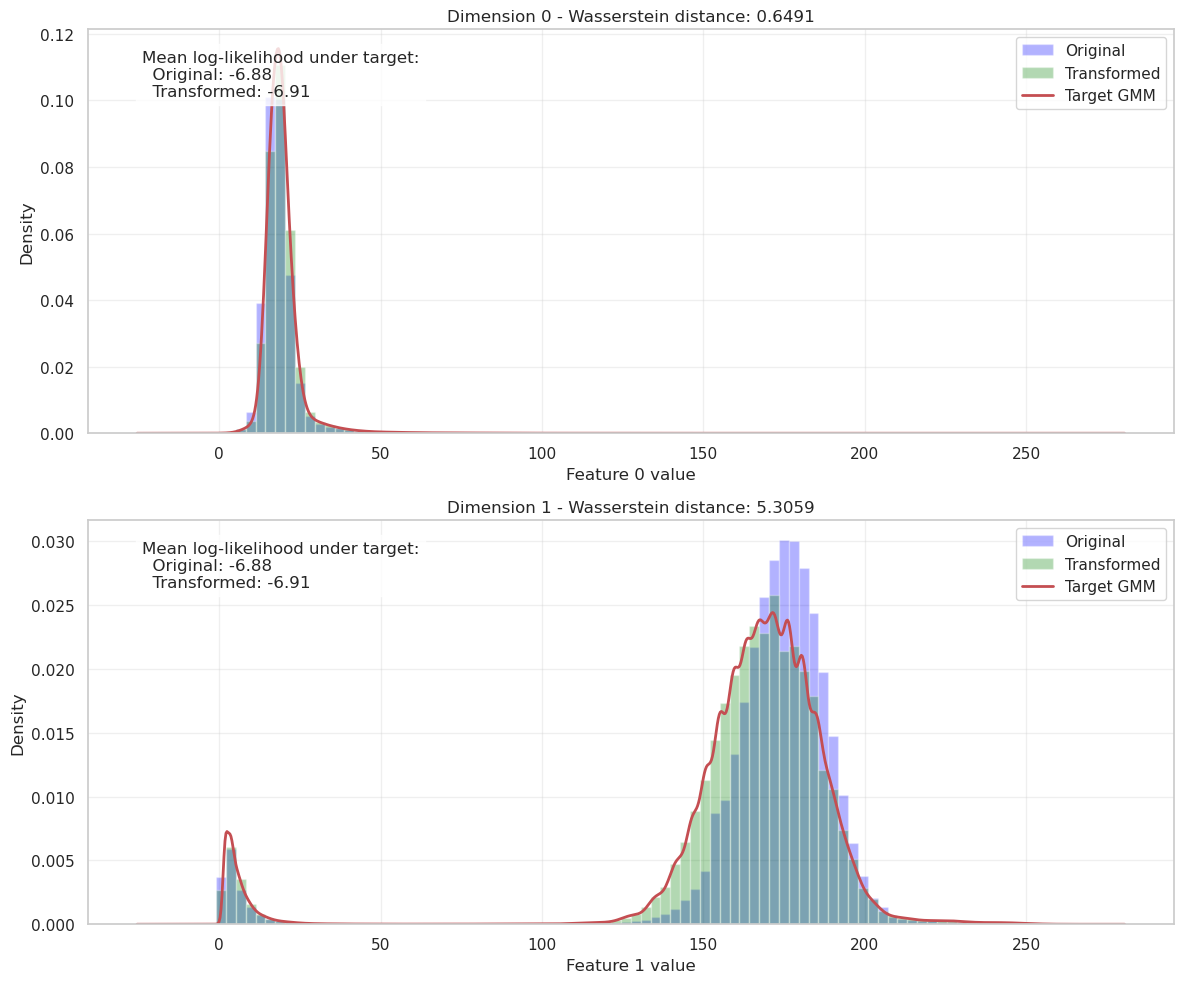

{'wasserstein_distances': [0.6490573630099079, 5.305916777988747],
 'mean_source_likelihood': -6.8793429498969605,
 'mean_transformed_likelihood': -6.90876148198653,
 'likelihood_improvement': -0.02941853208956946}

In [10]:
validate_transformation(original.values, transformed.values, gmm_target)

In [44]:
strides_samples = load_sample_nos(
    "/home/dk659/bloodcounts_gitlab/sysmex_raw_alignment/data/raw/strides_centile_samples.npy"
)

In [45]:
sample_no = strides_samples[0]
channel = "RET"

In [46]:
strides_raw_folder = (
    "/home/dk659/bloodcounts_gitlab/sysmex_raw_alignment/data/raw/STRIDES_merged/SCT/"
)
strides_processed_folder = "/home/dk659/bloodcounts_gitlab/sysmex_raw_alignment/data/processed/STRIDES/transformed_to_INTERVAL36/SCT/"

In [47]:
# get all files containing sample_no from the raw folder
files = os.listdir(strides_raw_folder)
file_raw = [f for f in files if (sample_no in f) and (channel in f)][0]

# same for processed folder
files_processed = os.listdir(strides_processed_folder)
file_processed = [f for f in files_processed if (sample_no in f) and (channel in f)][0]

In [48]:
file_raw, file_processed

('RET_[XN-20^14232][00-22_123][20210930_192208][      =G07352114365694].116.csv',
 'RET_[XN-20^14232][00-22_123][20210930_192208][      =G07352114365694].116_transformed.csv')

In [49]:
raw = SysmexRawData(strides_raw_folder + file_raw)
processed = SysmexRawData(strides_processed_folder + file_processed)

source_cct = pd.read_csv(
    "/home/dk659/bloodcounts_gitlab/sysmex_raw_alignment/transformations/STRIDES_RET_cct.csv"
)
source_transformed_cct = pd.read_csv(
    "/home/dk659/bloodcounts_gitlab/sysmex_raw_alignment/transformations/STRIDES_RET_cct_transformed.csv"
)
target_cct = pd.read_csv(
    "/home/dk659/bloodcounts_gitlab/sysmex_raw_alignment/transformations/INTERVAL36_RET_cct.csv"
)

In [50]:
with open(
    "/home/dk659/bloodcounts_gitlab/sysmex_raw_alignment/transformations/INTERVAL36_RET_GMM.pkl",
    "rb",
) as f:
    gmm_target = pickle.load(f)

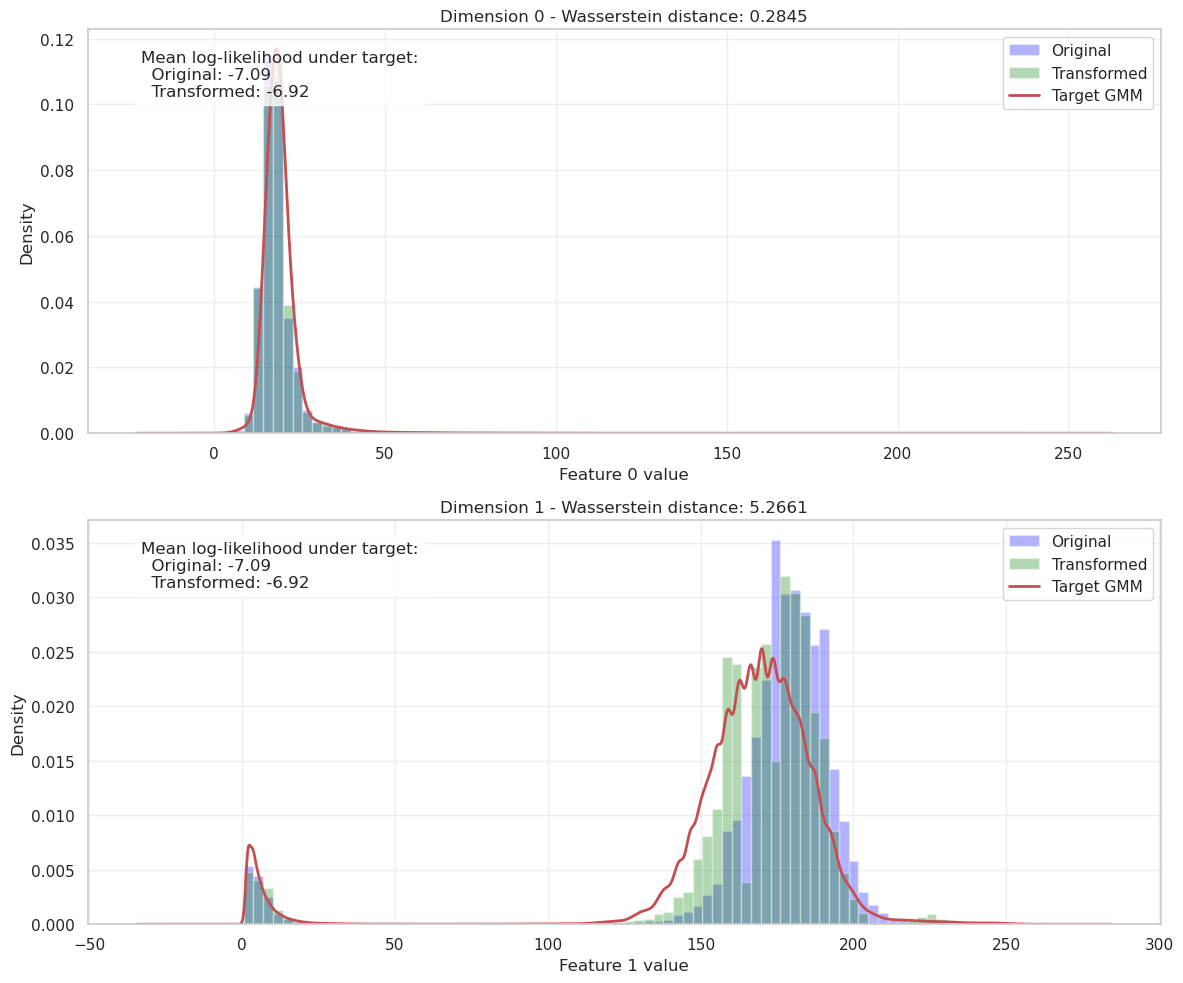

{'wasserstein_distances': [0.28452024288988537, 5.266146162350161],
 'mean_source_likelihood': -7.089138249399705,
 'mean_transformed_likelihood': -6.920276847373388,
 'likelihood_improvement': 0.16886140202631683}

In [51]:
validate_transformation(
    original_data=raw.data, transformed_data=processed.data, gmm_target=gmm_target
)

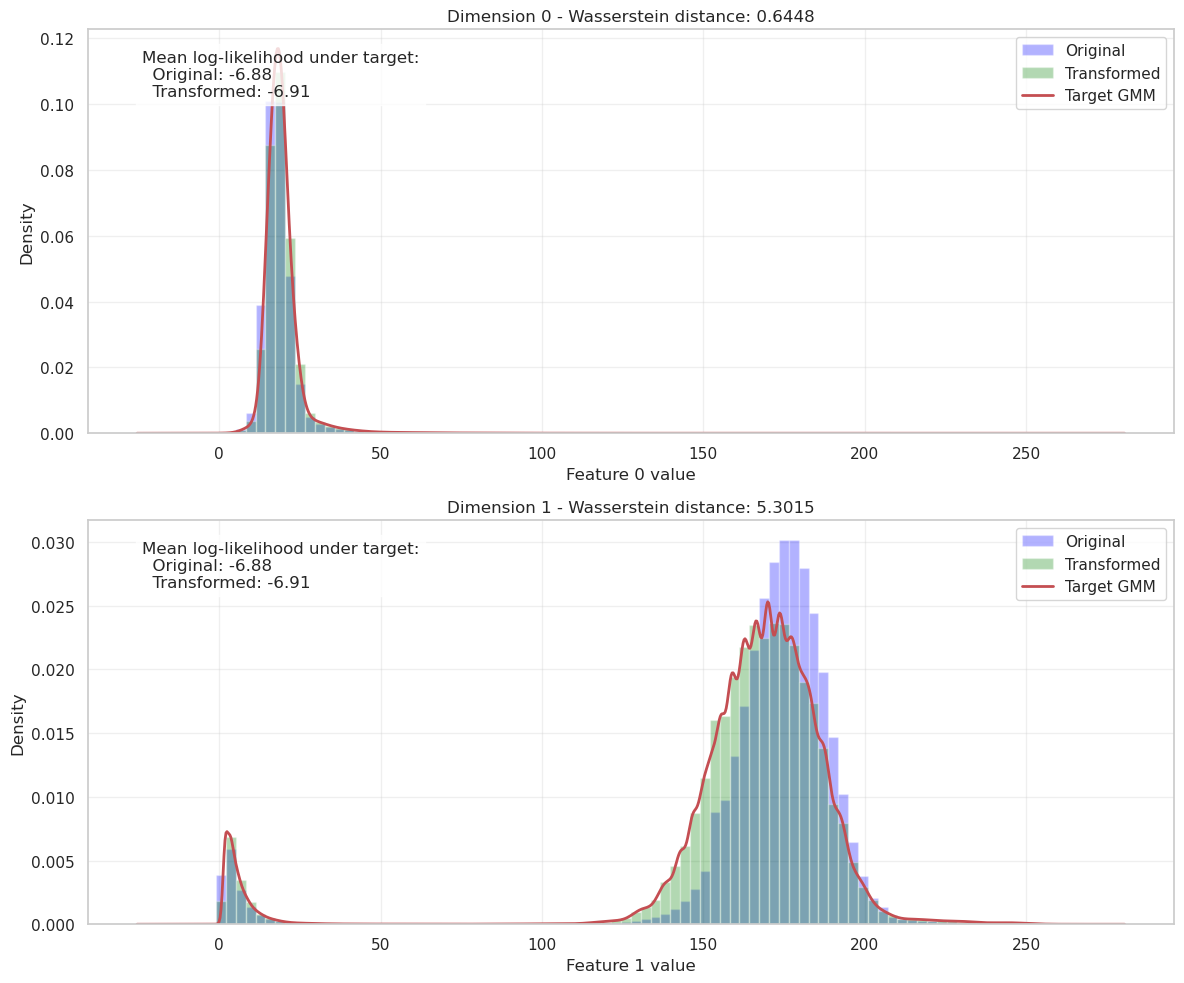

{'wasserstein_distances': [0.6447816367784358, 5.301496002273011],
 'mean_source_likelihood': -6.88314558915634,
 'mean_transformed_likelihood': -6.911185350728304,
 'likelihood_improvement': -0.028039761571964306}

In [52]:
validate_transformation(
    original_data=source_cct.values,
    transformed_data=source_transformed_cct.values,
    gmm_target=gmm_target,
)

<Axes: >

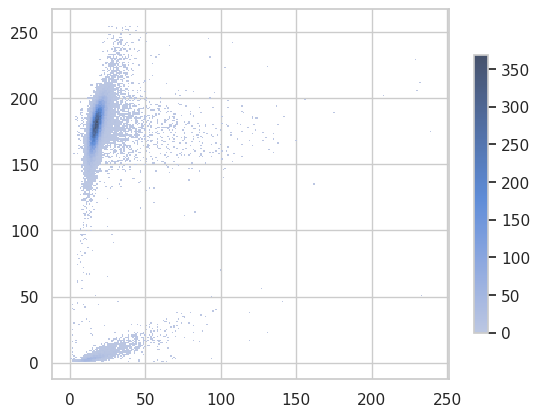

In [ ]:
sns.histplot(
    x=raw.data[:, 0],
    y=raw.data[:, 1],
    bins=30,
    discrete=(True, True),
    cbar=True,
    cbar_kws=dict(shrink=0.75),
)

<Axes: >

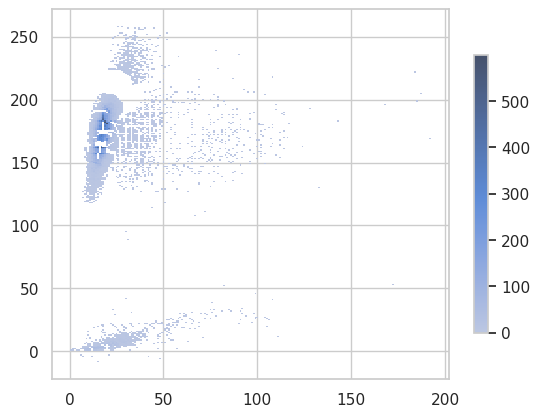

In [ ]:
sns.histplot(
    x=processed.data[:, 0],
    y=processed.data[:, 1],
    bins=30,
    discrete=(True, True),
    cbar=True,
    cbar_kws=dict(shrink=0.75),
)

<Axes: xlabel='SFL', ylabel='FSC'>

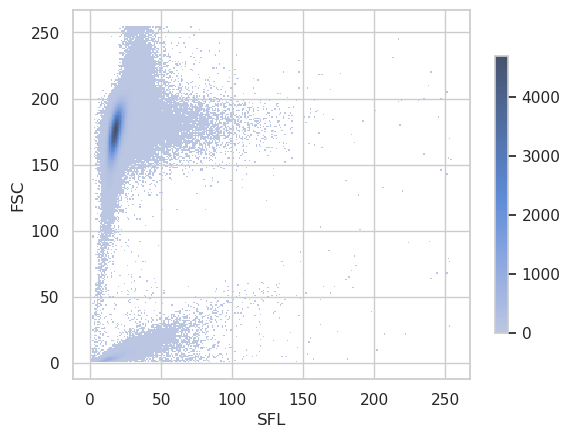

In [ ]:
sns.histplot(
    data=source_cct,
    x="SFL",
    y="FSC",
    bins=30,
    discrete=(True, True),
    cbar=True,
    cbar_kws=dict(shrink=0.75),
)

<Axes: xlabel='SFL', ylabel='FSC'>

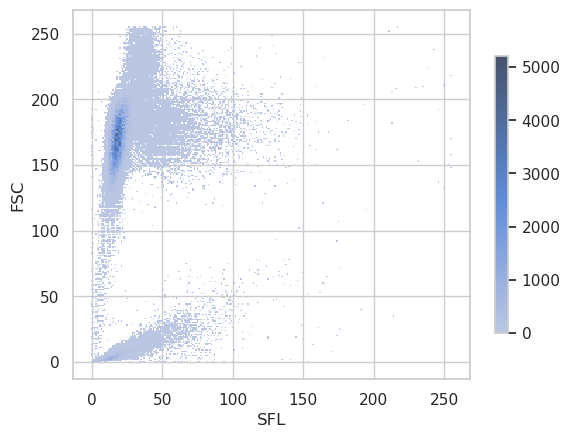

In [ ]:
sns.histplot(
    data=source_transformed_cct,
    x="SFL",
    y="FSC",
    bins=30,
    discrete=(True, True),
    cbar=True,
    cbar_kws=dict(shrink=0.75),
)

<Axes: xlabel='SFL', ylabel='FSC'>

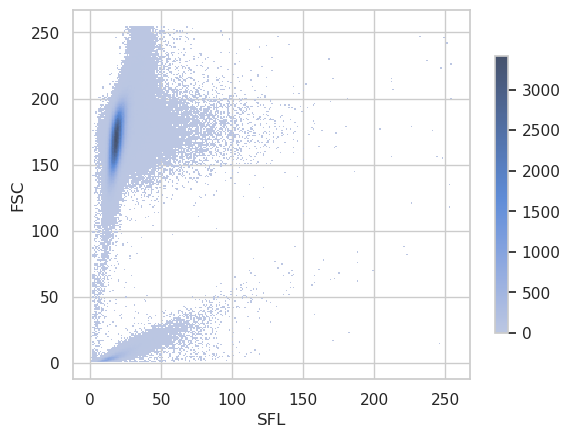

In [ ]:
sns.histplot(
    data=target_cct,
    x="SFL",
    y="FSC",
    bins=30,
    discrete=(True, True),
    cbar=True,
    cbar_kws=dict(shrink=0.75),
)